In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [5]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [6]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/MLRegression/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [13]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']

# get the summary
desc_mergeddata = MergedData [list].describe()

# add the standard deviation metric
desc_mergeddata.loc['+3_std'] = desc_mergeddata.loc['mean'] + (desc_mergeddata.loc['std'] * 3)
desc_mergeddata.loc['-3_std'] = desc_mergeddata.loc['mean'] - (desc_mergeddata.loc['std'] * 3)

# display it
desc_mergeddata

,2BDA,3BDA,NDCI,Chl-a
count,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,-0.005038,10.526351
std,0.132150,0.191915,0.054806,18.258538
min,0.406412,-0.183174,-0.113502,0.050000
25%,0.916918,-0.093031,-0.042380,1.900000
50%,0.966684,-0.035932,-0.016578,3.900000
75%,1.048701,0.067505,0.023032,9.992000
max,2.165665,2.150818,0.368135,166.300000
+3_std,1.391925,0.591042,0.159379,65.301966
-3_std,0.599024,-0.560448,-0.169455,-44.249264


In [18]:
# Pearson Coefficient 
corr = MergedData[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.901674,0.947186,0.400061
3BDA,0.901674,1.000000,0.912430,0.289175
NDCI,0.947186,0.912430,1.000000,0.442198
Chl-a,0.400061,0.289175,0.442198,1.000000


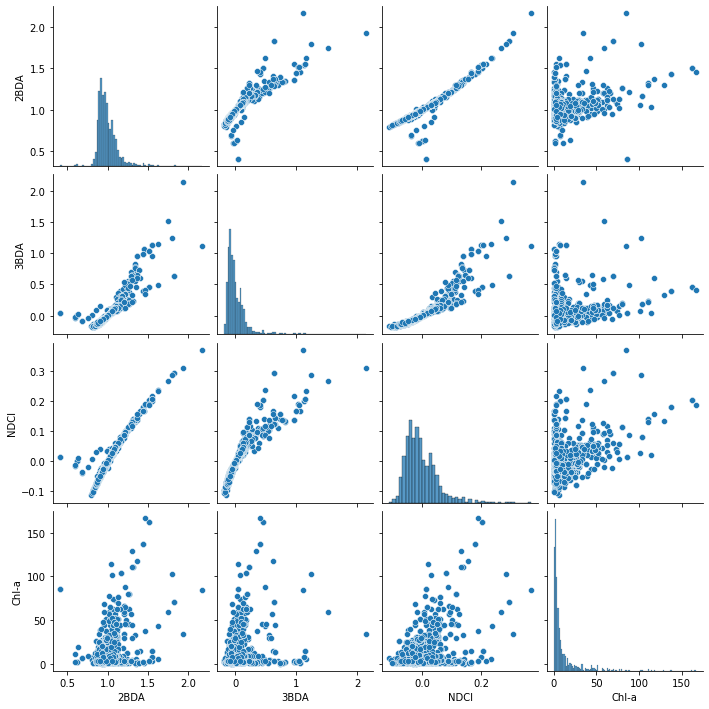

In [20]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData[list])

In [21]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData["Chl-a"]

In [22]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:3]].values, i) for i in range(MergedData[X_columns[0:3]].shape[1])]
vif["features"] = MergedData[X_columns[0:3]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,6.0,3BDA
2,6.0,NDCI


In [34]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData[X_columns]
Y = MergedData['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                              276.0
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                   1.13e-131
Time:                        15:59:43   Log-Likelihood:                         -4347.4
No. Observations:                1040   AIC:                                      8701.
Df Residuals:                    1037   BIC:                                      8716.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)


predicted Y: 91       1.315441
1102   -10.659122
1237     6.499397
683     10.902246
561      8.473387
          ...    
154     36.932319
639     19.593874
768      8.889809
821      1.588959
1006    13.417359
Length: 447, dtype: float64


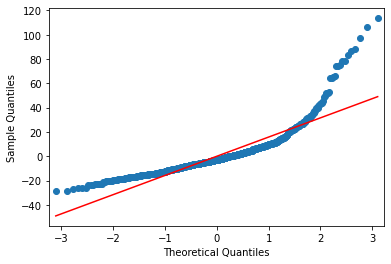

The mean of the residuals is 0.02883


In [60]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [61]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.24e+02
MAE 9.62
RMSE 15.0
